출처: https://github.com/SLCFLAB/Data-Science-Python

https://github.com/Harry24k/Pytorch-Basic

# GAN with CIFAR10

## 과제 설명




아래 물음표로 되어 있는 곳을 채워서 제출하시고, 다양한 hyperparameter 변경, 혹은 다양한 기법을 통해서 성능을 높이는 것이 최종 목표입니다

4월 19일 수요일 자정까지 CNN, 그리고 추가적으로 배울 GAN 모델을 CIFAR-10에 대해서 구현해보는 것이 목표입니다.

# GAN

* 🧔🏻 G: 위조지폐 제작
* 👮🏻‍♀️ D: 위조지폐 판별 - G 실패
* 🧔🏻 G: 다시 위조지폐 제작
* 👮🏻‍♀️ D: 판별 실패 - G 성공

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [ ]:
train_data = dsets.CIFAR10(root='./data', 
                           train=True,
                           download=True, 
                           transform=transforms.ToTensor())

test_data  = dsets.CIFAR10(root='./data', 
                           train=False,
                           download=True, 
                           transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
batch_size = 100

train_loader = DataLoader(train_data, 
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(test_data, 
                         batch_size=5,
                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 
           'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
def imshow(img, title):
    img = torchvision.utils.make_grid(img, normalize=True)
    npimg = img.numpy()
    fig = plt.figure(figsize = (5, 15))
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.axis('off')
    plt.show()

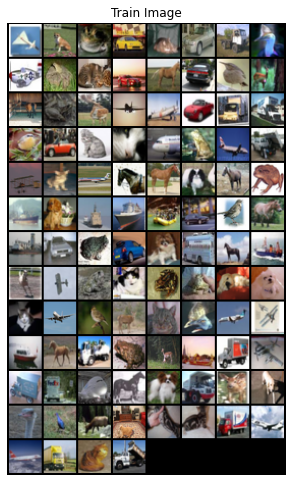

In [ ]:
#CIFAR 10에는 다음과 같은 그림이 들어있습니다.
#총 10개의 class
train_iter = iter(train_loader)
images, labels = next(train_iter)

imshow(images, "Train Image")

In [ ]:
images.shape # 각 image의 size는 32*32이며, batch size = 128, channel = 3(color)입니다.


torch.Size([100, 3, 32, 32])

### 아래 Discriminator와 Generator  코드에 빈칸을 채워 오류가 나지 않도록 원하시는 대로 숫자를 넣어 코드를 돌리고 제출해주세요!:

# Discriminator

In [ ]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.discriminator = nn.Sequential(nn.Linear( , ),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(, ),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(, ),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        x = x.view( , )
        out = self.discriminator(x)
        return out

# Generator

In [ ]:
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.generator = nn.Sequential(
            nn.Linear(100, ),
            nn.ReLU(),
            nn.Linear( , ),
            nn.ReLU(),
            nn.Linear( , ),
            nn.Sigmoid()
        )
        
    def forward(self, z):
        out = self.generator(z)
        out = out.view(-1, , , )
        return out
      

In [ ]:
D = Discriminator().cuda()
G = Generator().cuda()

# Train

In [ ]:
def gan_loss(x, target_is_real):
    
    loss = nn.BCELoss()
    
    if target_is_real : 
        target_tensor = torch.ones(batch_size, 1)
        
    else :
        target_tensor = torch.zeros(batch_size, 1)
        
    return loss(x, target_tensor.cuda())

In [ ]:
G_optimizer = optim.Adam(G.parameters(), lr=0.0001)
D_optimizer = optim.Adam(D.parameters(), lr=0.0001)

In [ ]:
num_epochs = 150


In [ ]:
for epoch in range(num_epochs):
        
    total_batch = len(train_data) // batch_size
    
    for i, (images, labels) in enumerate(train_loader):
        
        images = images.cuda()
            
        # Discreminator
        prob_real = D(images)
        D_loss_real = gan_loss(prob_real, True)

        z = torch.randn((batch_size, 100)).cuda()
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        D_loss_fake = gan_loss(prob_fake, False)
        
        D_loss = D_loss_real + D_loss_fake
        
        D.zero_grad()
        D_loss.backward()
        D_optimizer.step()
        
        # Generator
        z = torch.randn((batch_size, 100)).cuda()
        fake_images = G(z)
        
        prob_fake = D(fake_images)
        G_loss = gan_loss(prob_fake, True)
        
        G.zero_grad()
        G_loss.backward()
        G_optimizer.step()
        
        if (i+1) % 100 == 0:
            print('Epoch [%d/%d], lter [%d/%d], D_Loss: %.4f, G_Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, D_loss.item(), G_loss.item()))

Epoch [1/150], lter [100/500], D_Loss: 0.2987, G_Loss: 3.4970
Epoch [1/150], lter [200/500], D_Loss: 0.3183, G_Loss: 2.9140
Epoch [1/150], lter [300/500], D_Loss: 0.3831, G_Loss: 2.3819
Epoch [1/150], lter [400/500], D_Loss: 0.3171, G_Loss: 2.5021
Epoch [1/150], lter [500/500], D_Loss: 0.3544, G_Loss: 2.1402
Epoch [2/150], lter [100/500], D_Loss: 0.3817, G_Loss: 2.0843
Epoch [2/150], lter [200/500], D_Loss: 0.4333, G_Loss: 2.3910
Epoch [2/150], lter [300/500], D_Loss: 0.6328, G_Loss: 2.0284
Epoch [2/150], lter [400/500], D_Loss: 0.4143, G_Loss: 2.3203
Epoch [2/150], lter [500/500], D_Loss: 0.5610, G_Loss: 1.8249
Epoch [3/150], lter [100/500], D_Loss: 0.5261, G_Loss: 2.0143
Epoch [3/150], lter [200/500], D_Loss: 0.5259, G_Loss: 2.0307
Epoch [3/150], lter [300/500], D_Loss: 0.6408, G_Loss: 2.1378
Epoch [3/150], lter [400/500], D_Loss: 0.3958, G_Loss: 2.1178
Epoch [3/150], lter [500/500], D_Loss: 0.6759, G_Loss: 1.5187
Epoch [4/150], lter [100/500], D_Loss: 0.5831, G_Loss: 2.0235
Epoch [4

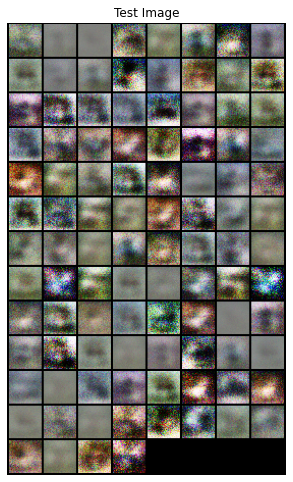

In [ ]:
G.eval()

z = torch.randn((batch_size, 100)).cuda()
images = G(z)
imshow(torchvision.utils.make_grid(images.data.cpu(), normalize=True), "Test Image")